In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np
from datetime import datetime
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv("/content/gdrive/My Drive/tweetsConvereted2017_toxicPerspectiveScore.csv")

In [4]:
df["month"] = df["NewDateFormat"].apply(lambda x: datetime.strptime(x, "%Y-%m-%d %H:%M:%S").strftime("%m"))

In [38]:
unique_values = df['month'].unique()
unique_values.sort()

In [39]:
groupDf = df[['user_id', 'Toxicity','month']]

In [40]:
def countUsersForMonth(monthIn):
  monthDf = groupDf[groupDf['month'] == monthIn]
  groupedDf = monthDf.groupby('user_id').mean()
  groupedDf['Toxicity'] = groupedDf['Toxicity'] * 10
  groupedDf['Toxicity'] = (groupedDf['Toxicity'].apply(np.ceil)) / 10
  groupedDf = groupedDf[groupedDf['Toxicity'] != 0.0]
  dict_cat = {}
  for j in range(10):
      string_want  = f"{(j+1)/10}" 
      dict_cat[string_want] = 0
  for index, row in groupedDf.iterrows():
    t_score = row["Toxicity"]
    string_put = f"{t_score}"
    dict_cat[string_put] += 1
  keys = list(dict_cat.keys())
  values = list(dict_cat.values())
  plt.plot(keys, values)
  plt.xlabel('Toxicity')
  plt.ylabel('Number of Users')
  plt.title(f"Month Number - {monthIn}")
  plt.show()

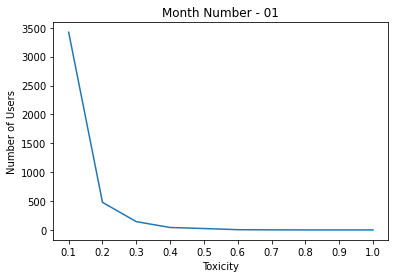

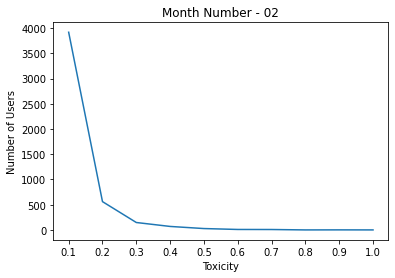

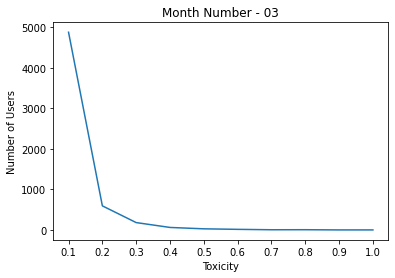

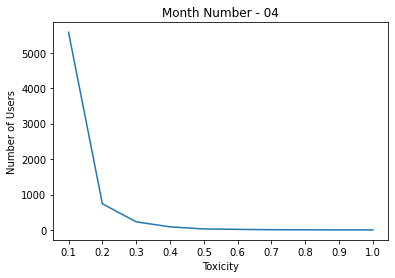

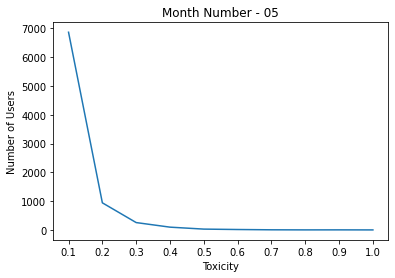

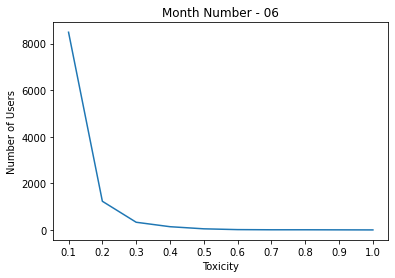

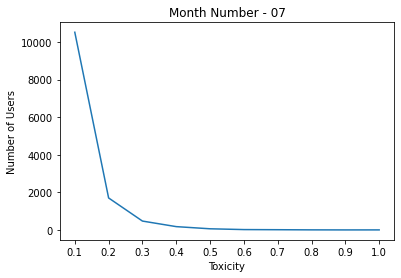

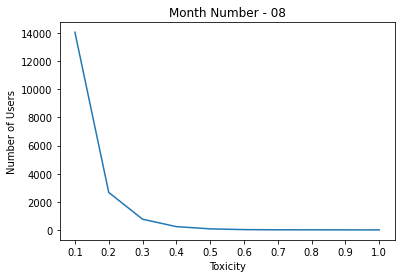

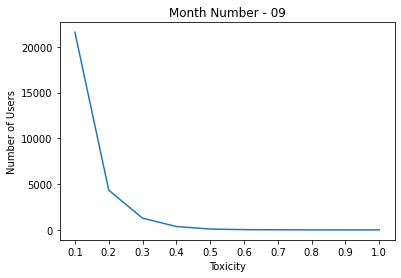

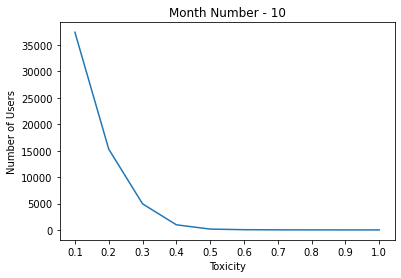

In [41]:
for i in unique_values:
  countUsersForMonth(i)

In [42]:
def countUsersForMonthWithLog(monthIn):
  monthDf = groupDf[groupDf['month'] == monthIn]
  groupedDf = monthDf.groupby('user_id').mean()
  groupedDf['Toxicity'] = groupedDf['Toxicity'] * 10
  groupedDf['Toxicity'] = (groupedDf['Toxicity'].apply(np.ceil)) / 10
  groupedDf = groupedDf[groupedDf['Toxicity'] != 0.0]
  dict_cat = {}
  for j in range(10):
      string_want  = f"{(j+1)/10}" 
      dict_cat[string_want] = 0
  for index, row in groupedDf.iterrows():
    t_score = row["Toxicity"]
    string_put = f"{t_score}"
    dict_cat[string_put] += 1
  keys = list(dict_cat.keys())
  values = list(dict_cat.values())
  plt.semilogy(keys, values)
  plt.xlabel('Toxicity')
  plt.ylabel('Number of Users')
  plt.title(f"Month Number - {monthIn}")
  plt.show()

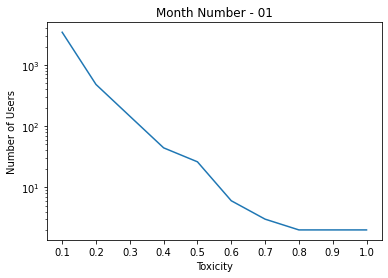

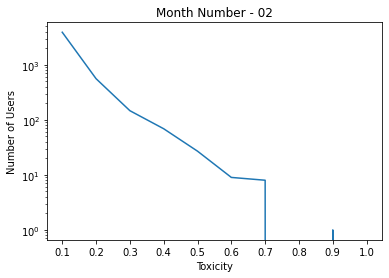

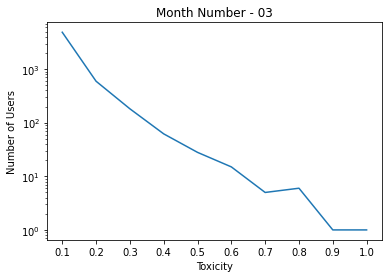

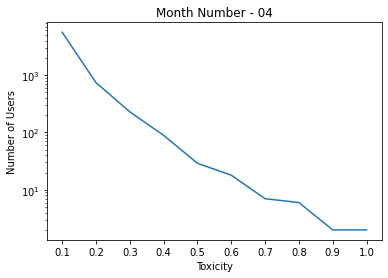

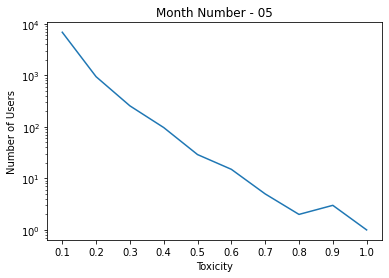

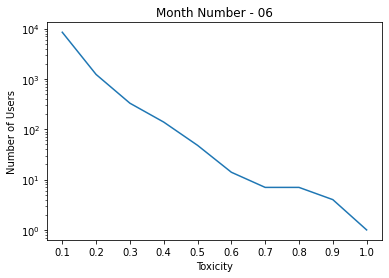

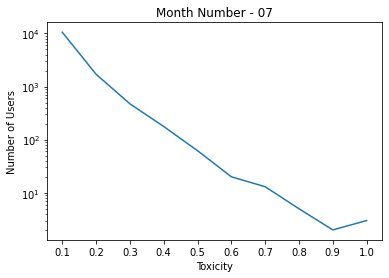

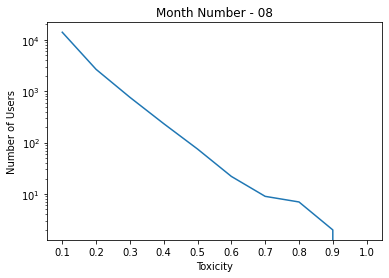

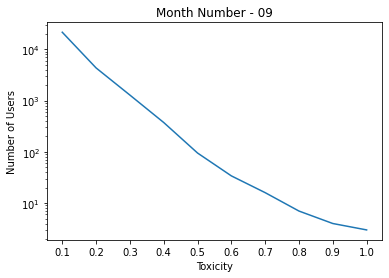

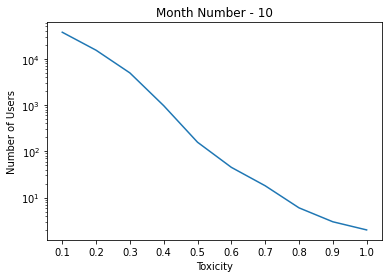

In [43]:
for i in unique_values:
  countUsersForMonthWithLog(i)